In [9]:
import cv2
import numpy as np
import os

gt_masks_dir = 'Test_Dataset/ColourTest3/GTMasks'
gradcam_masks_dir = 'GradCAM_Masks2'

gt_mask_files = sorted(os.listdir(gt_masks_dir))
gradcam_mask_files = sorted(os.listdir(gradcam_masks_dir))

def calculate_metrics(pred_mask, gt_mask):
    pred = pred_mask.flatten()
    gt = gt_mask.flatten()

    # True Positives (intersection)
    tp = np.sum(np.logical_and(pred, gt))

    # False Positives
    fp = np.sum(np.logical_and(pred, np.logical_not(gt)))

    # False Negatives
    fn = np.sum(np.logical_and(np.logical_not(pred), gt))

    # Precision and Recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # F1 Score
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

def resize_mask(mask, target_size=(224, 224)):
    return cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)

f1_scores = []
precisions = []
recalls = []


for gt_file, gradcam_file in zip(gt_mask_files, gradcam_mask_files):

    gt_mask_path = os.path.join(gt_masks_dir, gt_file)
    gradcam_mask_path = os.path.join(gradcam_masks_dir, gradcam_file)

    gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
    gradcam_mask = cv2.imread(gradcam_mask_path, cv2.IMREAD_GRAYSCALE)

    gt_mask_resized = resize_mask(gt_mask)
    gradcam_mask_resized = resize_mask(gradcam_mask)

    _, gt_mask_bin = cv2.threshold(gt_mask_resized, 127, 255, cv2.THRESH_BINARY)
    _, gradcam_mask_bin = cv2.threshold(gradcam_mask_resized, 127, 255, cv2.THRESH_BINARY)

    gt_mask_bin = gt_mask_bin.astype(bool)
    gradcam_mask_bin = gradcam_mask_bin.astype(bool)

    precision, recall, f1 = calculate_metrics(gradcam_mask_bin, gt_mask_bin)
   
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1 = np.mean(f1_scores)

for gt_file, gradcam_file, prec, rec, f1 in zip(gt_mask_files, gradcam_mask_files, precisions, recalls, f1_scores):
    print(f'Metrics for {gt_file} and {gradcam_file}:')
    print(f'  Precision: {prec:.4f}')
    print(f'  Recall:    {rec:.4f}')
    print(f'  F1 Score:  {f1:.4f}\n')

print('\nAverage metrics across all masks:')
print(f'Average Precision: {average_precision:.4f}')
print(f'Average Recall:    {average_recall:.4f}')
print(f'Average F1 Score:  {average_f1:.4f}')

Metrics for render_202_persp_left_before_mask.png and depth_202_persp_left.png0001.png:
  Precision: 0.5196
  Recall:    0.3533
  F1 Score:  0.4206

Metrics for render_202_persp_right_before_mask.png and depth_202_persp_right.png0001.png:
  Precision: 0.5256
  Recall:    0.2966
  F1 Score:  0.3792

Metrics for render_204_persp_left_before_mask.png and depth_204_persp_left.png0001.png:
  Precision: 0.5771
  Recall:    0.4472
  F1 Score:  0.5039

Metrics for render_204_persp_right_before_mask.png and depth_204_persp_right.png0001.png:
  Precision: 0.5472
  Recall:    0.2039
  F1 Score:  0.2971

Metrics for render_207_persp_left_before_mask.png and depth_207_persp_left.png0001.png:
  Precision: 0.5430
  Recall:    0.2194
  F1 Score:  0.3126

Metrics for render_207_persp_right_before_mask.png and depth_207_persp_right.png0001.png:
  Precision: 0.3811
  Recall:    0.1996
  F1 Score:  0.2620

Metrics for render_208_persp_left_before_mask.png and depth_208_persp_left.png0001.png:
  Precision:

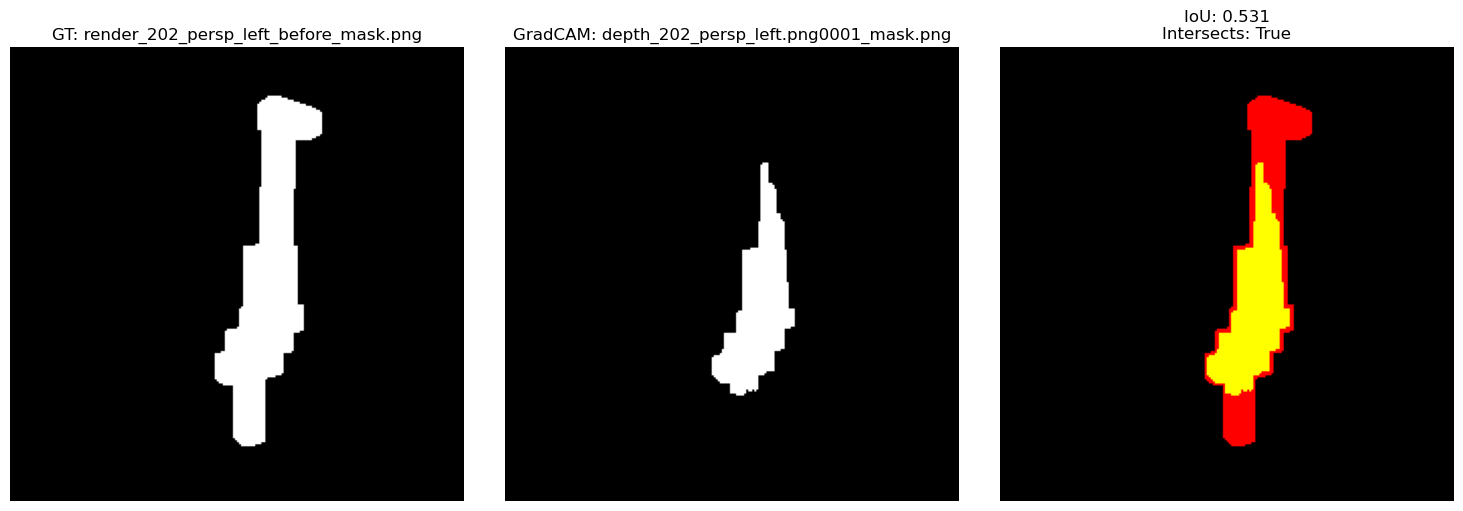

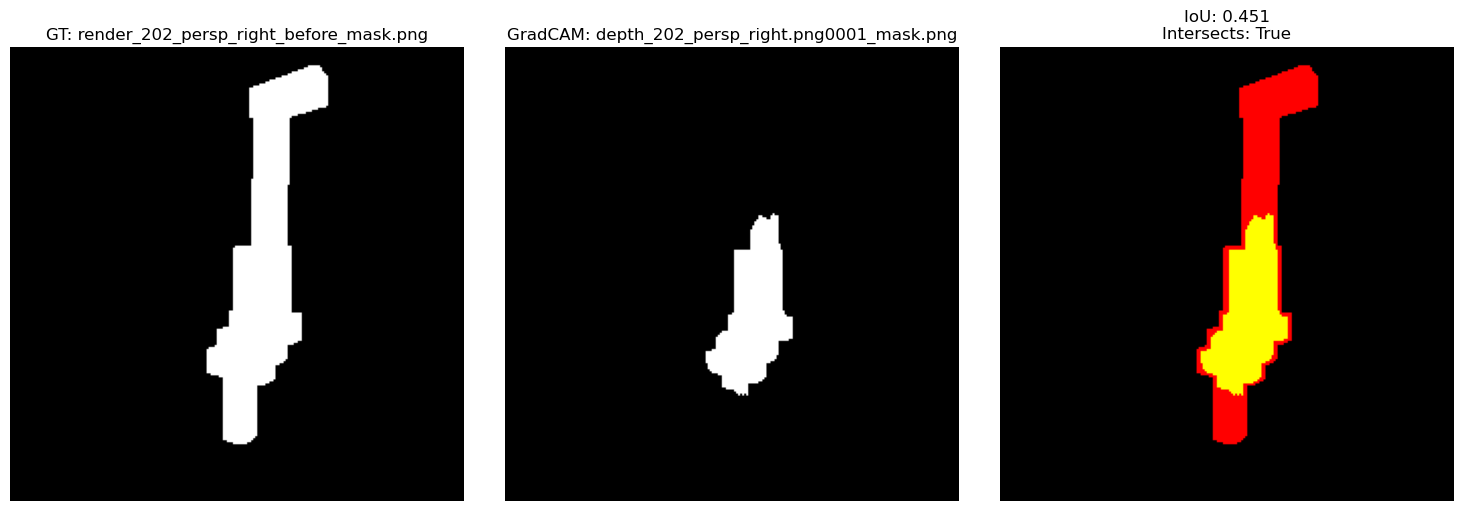

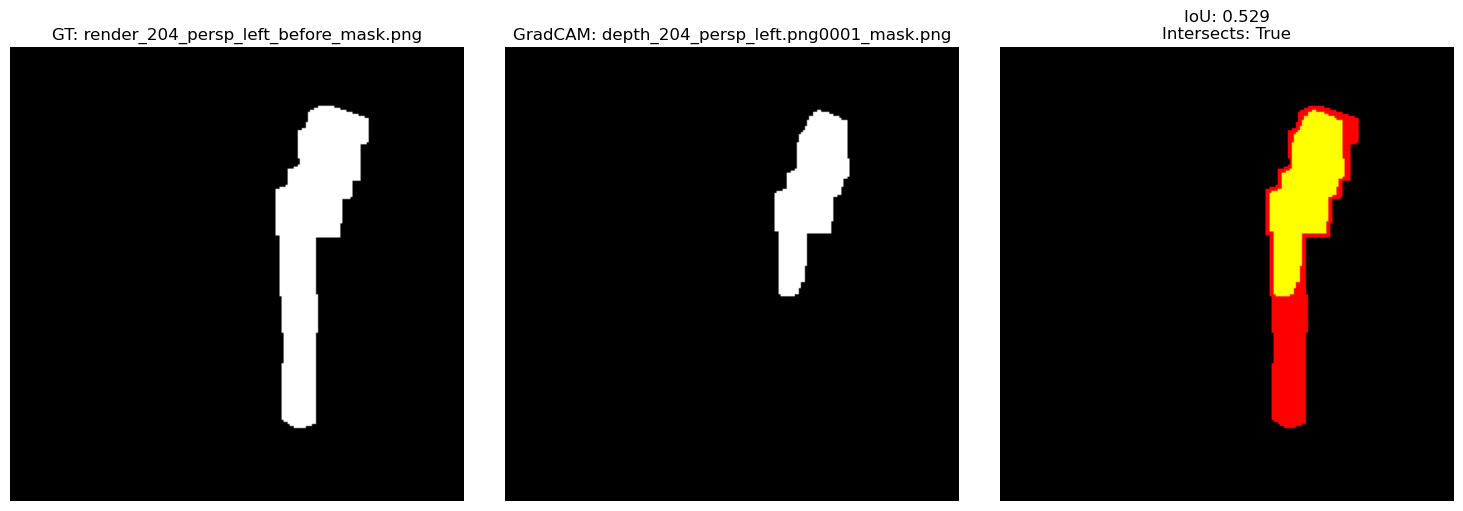


Processed 50 valid pairs
Average IoU: 0.2912
Intersection Rate: 82.00%
Visualized indices: [0, 1, 2]


In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

gt_masks_dir = 'Test_Dataset/ColourTest3/GTMasks'
gradcam_masks_dir = 'Test_Dataset/ColourTest3/LIMEmasks'
VISUALIZE_INDICES = [0, 1, 2]


gt_mask_files = sorted([f for f in os.listdir(gt_masks_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
gradcam_mask_files = sorted([f for f in os.listdir(gradcam_masks_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

def calculate_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    return np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0.0

def check_intersection(gt_mask, pred_mask):
    return np.any(np.logical_and(gt_mask, pred_mask))

def load_and_preprocess_mask(path, filename, target_size=(224, 224)):
    mask = cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Failed to load {filename}")
    mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)
    _, mask_bin = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    return mask_bin.astype(bool)

def visualize_pair(gt_file, gradcam_file, iou, intersected):
    gt_mask = load_and_preprocess_mask(gt_masks_dir, gt_file)
    gradcam_mask = load_and_preprocess_mask(gradcam_masks_dir, gradcam_file)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(gt_mask, cmap='gray')
    plt.title(f'GT: {os.path.basename(gt_file)}')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gradcam_mask, cmap='gray')
    plt.title(f'GradCAM: {os.path.basename(gradcam_file)}')
    plt.axis('off')
    
    overlay = np.zeros((*gt_mask.shape, 3), dtype=np.uint8)
    overlay[gt_mask] = [255, 0, 0]
    overlay[gradcam_mask] = [0, 255, 0]
    overlay[np.logical_and(gt_mask, gradcam_mask)] = [255, 255, 0]
    
    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title(f'IoU: {iou:.3f}\nIntersects: {intersected}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

iou_scores = []
intersection_results = []
valid_pairs = []

for idx, (gt_file, gradcam_file) in enumerate(zip(gt_mask_files, gradcam_mask_files)):
    try:
        gt_mask = load_and_preprocess_mask(gt_masks_dir, gt_file)
        gradcam_mask = load_and_preprocess_mask(gradcam_masks_dir, gradcam_file)
        
        iou = calculate_iou(gt_mask, gradcam_mask)
        intersected = check_intersection(gt_mask, gradcam_mask)
        
        iou_scores.append(iou)
        intersection_results.append(intersected)
        valid_pairs.append((gt_file, gradcam_file, iou, intersected))
        
        # Visualize if index is in our list
        if idx in VISUALIZE_INDICES:
            visualize_pair(gt_file, gradcam_file, iou, intersected)
            
    except Exception as e:
        print(f"Skipping pair {idx}: {str(e)}")

# Results summary
print(f"\nProcessed {len(valid_pairs)} valid pairs")
print(f"Average IoU: {np.mean(iou_scores):.4f}")
print(f"Intersection Rate: {np.mean(intersection_results):.2%}")
print(f"Visualized indices: {VISUALIZE_INDICES}")